# Project Predicting BitCoin Price  using historical data for 1 year 

# By Ahmed Naser

# Importing Libraries:

In [1]:
#importing the libraries and the data csv file 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import scipy.stats as stats
import seaborn as sns
import math, time
import itertools
from sklearn import preprocessing
from operator import itemgetter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import LSTM
import keras
import h5py
import requests
bt_df = pd.read_csv('bit_coin_ex.csv')
# understanding the data 
bt_df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 16, 2015",262.9,254.4,267.3,253.9,95.18K,3.31%
1,"Oct 17, 2015",269.6,262.9,275.4,261.7,113.84K,2.55%
2,"Oct 18, 2015",261.7,269.6,272.4,259.5,52.27K,-2.93%
3,"Oct 19, 2015",263.8,261.7,266.0,259.9,58.17K,0.82%
4,"Oct 20, 2015",269.8,263.8,272.1,262.7,75.40K,2.25%


In [2]:
bt_df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2193,2193,2193,2193,2193,2193,2193
unique,2193,2158,2151,2149,2153,2084,1066
top,"Jul 10, 2020",567.0,448.5,435.3,592.8,1.05M,-0.06%
freq,1,2,2,2,3,6,11


In [3]:
bt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2193 non-null   object
 1   Price     2193 non-null   object
 2   Open      2193 non-null   object
 3   High      2193 non-null   object
 4   Low       2193 non-null   object
 5   Vol.      2193 non-null   object
 6   Change %  2193 non-null   object
dtypes: object(7)
memory usage: 120.1+ KB


In [4]:
# converting the date to date time 
#cleaning the data
bt_df['Date'] =pd.to_datetime(bt_df['Date'], infer_datetime_format=True)

In [5]:
bt_df['Date']

0      2015-10-16
1      2015-10-17
2      2015-10-18
3      2015-10-19
4      2015-10-20
          ...    
2188   2021-10-12
2189   2021-10-13
2190   2021-10-14
2191   2021-10-15
2192   2021-10-16
Name: Date, Length: 2193, dtype: datetime64[ns]

In [6]:
bt_df.set_index('Date',inplace=True)

In [7]:
bt_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-10-16,262.9,254.4,267.3,253.9,95.18K,3.31%
2015-10-17,269.6,262.9,275.4,261.7,113.84K,2.55%
2015-10-18,261.7,269.6,272.4,259.5,52.27K,-2.93%
2015-10-19,263.8,261.7,266.0,259.9,58.17K,0.82%
2015-10-20,269.8,263.8,272.1,262.7,75.40K,2.25%


In [8]:
# checking the duplicates and nun values

sum(bt_df.duplicated())

0

In [9]:
bt_df.isnull()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-10-16,False,False,False,False,False,False
2015-10-17,False,False,False,False,False,False
2015-10-18,False,False,False,False,False,False
2015-10-19,False,False,False,False,False,False
2015-10-20,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-10-12,False,False,False,False,False,False
2021-10-13,False,False,False,False,False,False
2021-10-14,False,False,False,False,False,False


In [10]:
bt_df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [11]:
bt_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-10-16,262.9,254.4,267.3,253.9,95.18K,3.31%
2015-10-17,269.6,262.9,275.4,261.7,113.84K,2.55%
2015-10-18,261.7,269.6,272.4,259.5,52.27K,-2.93%
2015-10-19,263.8,261.7,266.0,259.9,58.17K,0.82%
2015-10-20,269.8,263.8,272.1,262.7,75.40K,2.25%


In [12]:
bt_df.dtypes
# converting data types 

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [13]:
bt_df['Change %'] = bt_df['Change %'].str.replace('%','').astype(float)

In [14]:
bt_df['Price'] = bt_df['Price'].str.replace(',','').astype(float)

In [15]:
bt_df['Open'] = bt_df['Open'].str.replace(',','').astype(float)

In [16]:
bt_df['High'] = bt_df['High'].str.replace(',','').astype(float)

In [17]:
bt_df['Low'] = bt_df['Low'].str.replace(',','').astype(float)

In [18]:
bt_df['Vol.']=bt_df['Vol.'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float)


In [19]:
bt_df['Vol.']

Date
2015-10-16     95180.0
2015-10-17    113840.0
2015-10-18     52270.0
2015-10-19     58170.0
2015-10-20     75400.0
                ...   
2021-10-12     74850.0
2021-10-13     73620.0
2021-10-14     59840.0
2021-10-15    121480.0
2021-10-16     49930.0
Name: Vol., Length: 2193, dtype: float64

In [20]:
bt_df.rename(columns={'Vol.': 'Vol'}, inplace=True)

In [21]:
bt_df.head()


,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2015-10-16,262.9,254.4,267.3,253.9,95180.0,3.31
2015-10-17,269.6,262.9,275.4,261.7,113840.0,2.55
2015-10-18,261.7,269.6,272.4,259.5,52270.0,-2.93
2015-10-19,263.8,261.7,266.0,259.9,58170.0,0.82
2015-10-20,269.8,263.8,272.1,262.7,75400.0,2.25


In [22]:
bt_df.describe()
#  getting describtive statitics for data analysis  
#as we see the values for the Vol K NEEDS TO BE CHECKED

,Price,Open,High,Low,Vol,Change %
count,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03,2193.000000
mean,11049.915002,11022.382809,11355.344140,10660.411628,5.079180e+05,0.332088
std,14372.323846,14334.893312,14787.183059,13841.095977,1.298619e+06,4.028708
min,261.700000,254.400000,266.000000,253.900000,2.600000e+02,-39.180000
25%,1248.200000,1243.100000,1257.000000,1218.400000,7.098000e+04,-1.250000
50%,6867.800000,6862.700000,7137.400000,6681.500000,1.420700e+05,0.230000
75%,10473.000000,10470.100000,10789.600000,10160.700000,5.099400e+05,1.980000
max,63540.900000,63544.200000,64778.000000,62067.500000,2.026000e+07,25.560000


In [23]:
bt_df[bt_df['Price'] == bt_df['Price'].min()]
#THE LOWEST Price VALUE 

,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2015-10-18,261.7,269.6,272.4,259.5,52270.0,-2.93


In [24]:
bt_df[bt_df['Price'] == bt_df['Price'].max()]
#The highest price Value 

,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2021-04-13,63540.9,59863.6,63659.0,59839.4,126560.0,6.14


In [25]:
bt_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2193 entries, 2015-10-16 to 2021-10-16
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2193 non-null   float64
 1   Open      2193 non-null   float64
 2   High      2193 non-null   float64
 3   Low       2193 non-null   float64
 4   Vol       2193 non-null   float64
 5   Change %  2193 non-null   float64
dtypes: float64(6)
memory usage: 119.9 KB


In [26]:
bt_df.head(30)
# we find  Noticeable increase in recent days for the price 

,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2015-10-16,262.9,254.4,267.3,253.9,95180.0,3.31
2015-10-17,269.6,262.9,275.4,261.7,113840.0,2.55
2015-10-18,261.7,269.6,272.4,259.5,52270.0,-2.93
2015-10-19,263.8,261.7,266.0,259.9,58170.0,0.82
2015-10-20,269.8,263.8,272.1,262.7,75400.0,2.25
2015-10-21,267.1,269.8,272.2,263.5,59640.0,-0.98
2015-10-22,274.4,267.1,278.7,266.8,93150.0,2.74
2015-10-23,276.9,274.4,279.8,273.2,69320.0,0.91
2015-10-24,282.6,276.9,283.0,277.0,60130.0,2.04


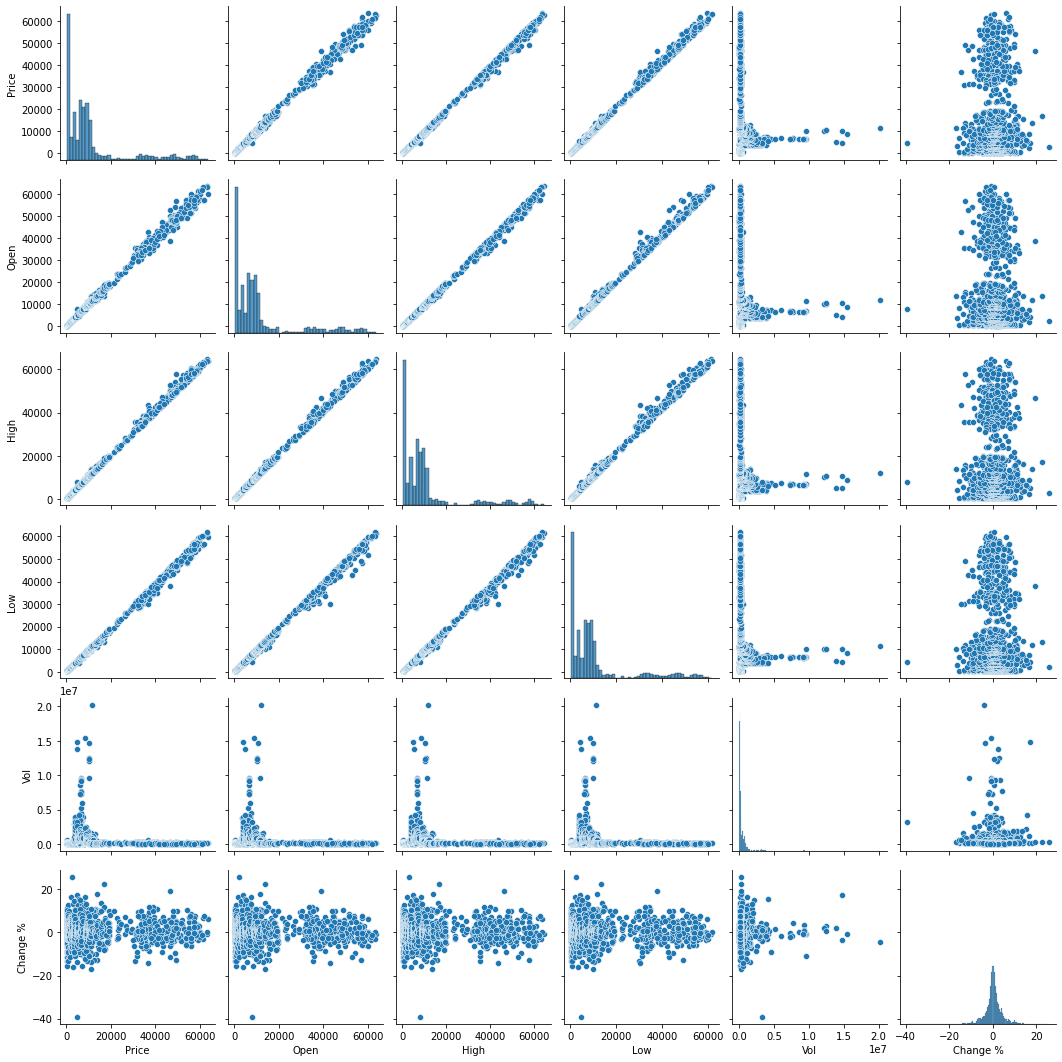

In [27]:
sns.pairplot(bt_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb26cc65e50>,
      dtype=object)

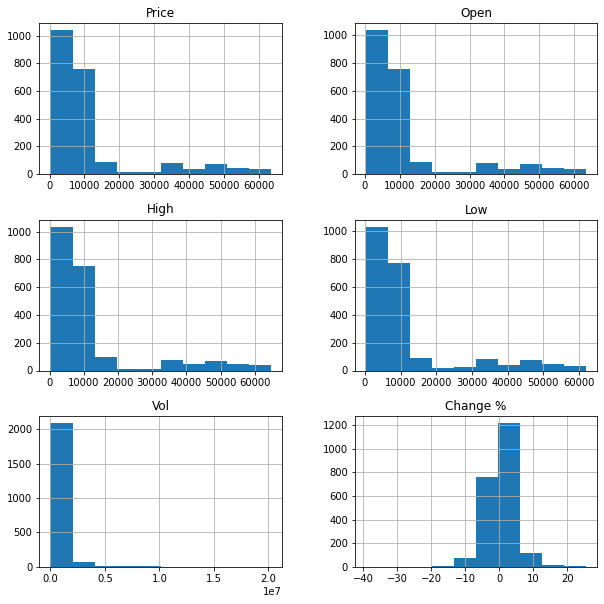

In [28]:
bt_df.hist(figsize=(10,10))
 


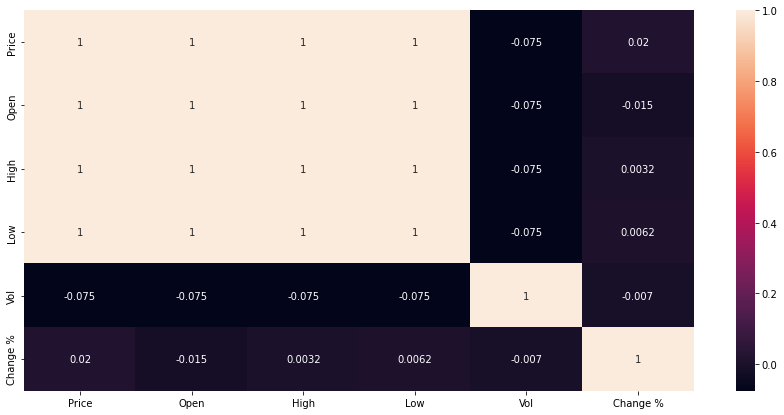

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(bt_df.corr(), annot=True)

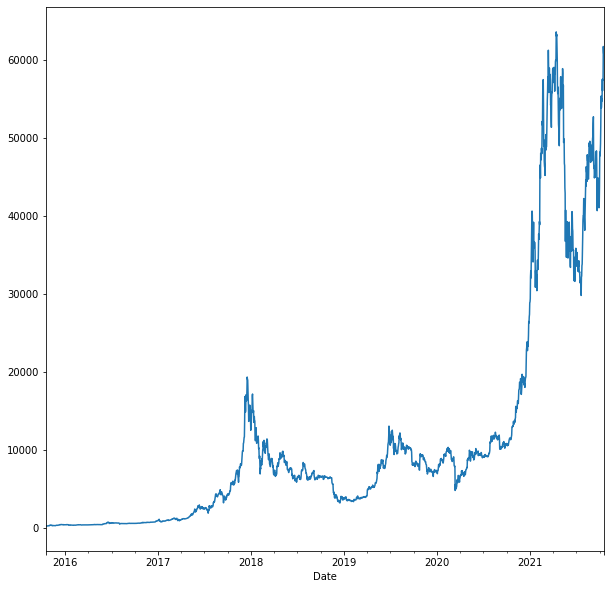

In [30]:
bt_df['Price'].plot(figsize=(10,10))

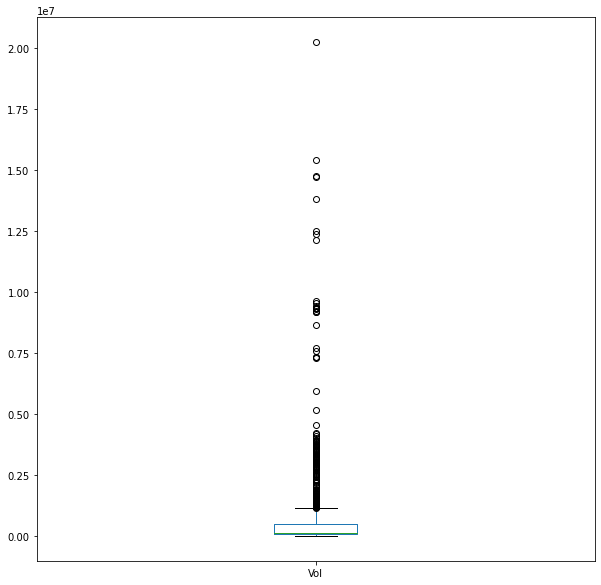

In [31]:
bt_df['Vol'].plot(kind='box',figsize=(10,10));
# As we see with Vol K box plot 
#we have outliers that i think its the reason for the skewness of the distribution 


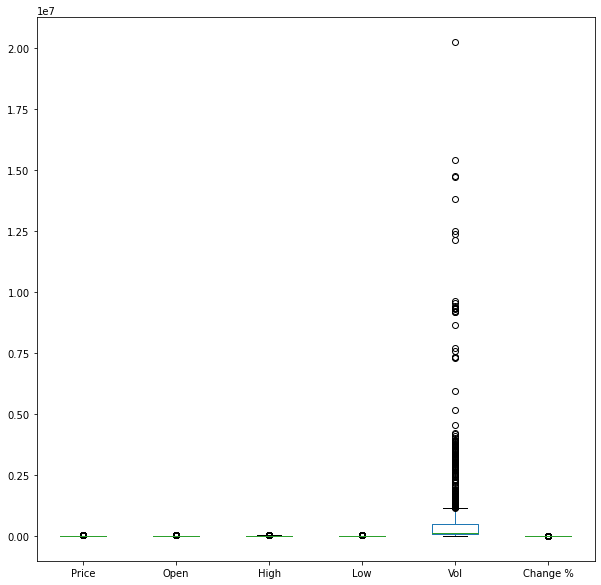

In [32]:
bt_df.plot(kind= 'box', figsize=(10,10))
# check the data correlations , normalization , sizes and outliers  

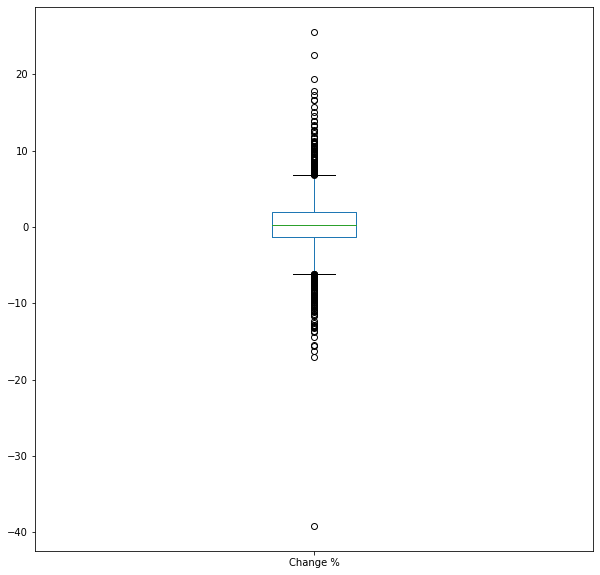

In [33]:
bt_df['Change %'].plot(kind='box',figsize=(10,10));
# AS we see the outliers here in Change % 
# but the distribution is approximately normal and the outliers doest effect that much 

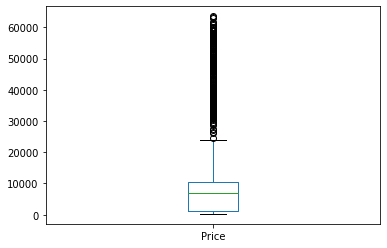

In [34]:
bt_df['Price'].plot(kind='box');

# its really good a clear strong Positive correlation here 


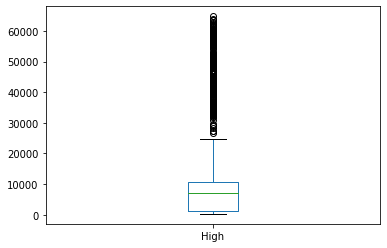

In [35]:
bt_df['High'].plot(kind='box');


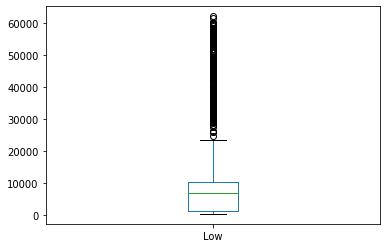

In [36]:
bt_df['Low'].plot(kind='box');
# we cant see a clear correlation here 
 

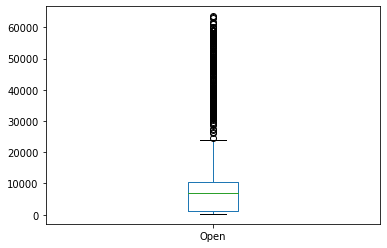

In [37]:
bt_df['Open'].plot(kind='box');


Text(0.5, 1.0, 'Change %')

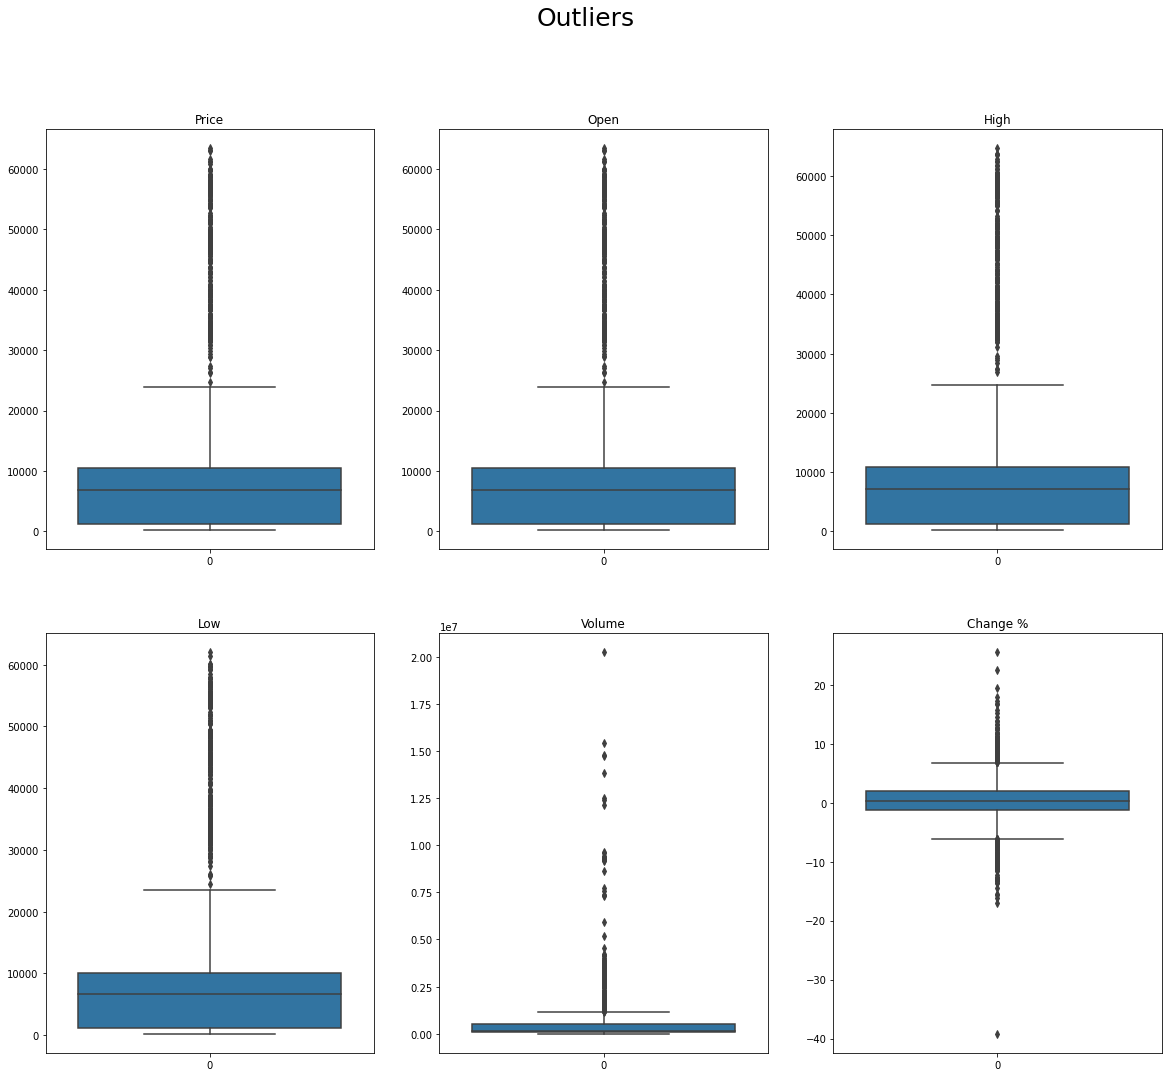

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(20, 17))
fig.suptitle('Outliers', fontsize=25)

ax=sns.boxplot(ax=axes[0,0], data=bt_df['Price'])
ax.set_title('Price')
ax=sns.boxplot(ax=axes[0,1], data=bt_df['Open'])
ax.set_title('Open')
ax=sns.boxplot(ax=axes[0,2], data=bt_df['High'])
ax.set_title('High')
ax=sns.boxplot(ax=axes[1,0], data=bt_df['Low'])
ax.set_title('Low')
ax=sns.boxplot(ax=axes[1,1], data=bt_df['Vol'])
ax.set_title('Volume')
ax=sns.boxplot(ax=axes[1,2], data=bt_df['Change %'])
ax.set_title('Change %')

In [39]:
bt_df.agg(['skew', 'kurtosis']).transpose()
# Vol K highly skewed to right 
# vol k skewnes is more that 1. 

,skew,kurtosis
Price,2.019588,3.115004
Open,2.021898,3.128203
High,2.011661,3.059617
Low,2.034225,3.208467
Vol,7.445426,71.592031
Change %,-0.183177,7.448397


In [40]:
Q1 = np.percentile(bt_df['Vol'], 25, interpolation = 'midpoint')
Q3 = np.percentile(bt_df['Vol'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Upper bound:",(Q3+1.5*IQR))
print("Lower bound:", (Q1-1.5*IQR))
upper_vol=(Q3 + 1.5 * IQR)
lower_vol=(Q1 - 1.5 * IQR)
print("Number of Outliers:", ((bt_df['Vol'] < (Q1 - 1.5 * IQR)) | (bt_df['Vol'] > (Q3 + 1.5 * IQR))).sum() )

Upper bound: 1168380.0
Lower bound: -587460.0
Number of Outliers: 160


In [41]:
Q1= np.percentile(bt_df['Change %'], 25, interpolation = 'midpoint')
Q3 = np.percentile(bt_df['Change %'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper_change=(Q3 + 1.5 * IQR)
lower_change=(Q1 - 1.5 * IQR)
print("Upper bound:",(Q3+1.5*IQR))
print("Lower bound:", (Q1-1.5*IQR))
upper_change=(Q3 + 1.5 * IQR)
lower_change=(Q1 - 1.5 * IQR)
print("Number of Outliers:", ((bt_df['Change %'] < (Q1 - 1.5 * IQR)) | (bt_df['Change %'] > (Q3 + 1.5 * IQR))).sum() )

Upper bound: 6.824999999999999
Lower bound: -6.095
Number of Outliers: 229


In [42]:
Q1= np.percentile(bt_df['Price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(bt_df['Price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Upper bound:",(Q3+1.5*IQR))
print("Lower bound:", (Q1-1.5*IQR))
upper_price = (Q3 + 1.5 * IQR)
lower_price = (Q1 - 1.5 * IQR)
print("Number of Outliers:", ((bt_df['Price'] < (Q1 - 1.5 * IQR)) | (bt_df['Price'] > (Q3 + 1.5 * IQR))).sum() )

Upper bound: 24310.199999999997
Lower bound: -12588.999999999998
Number of Outliers: 296


In [43]:
Q1= np.percentile(bt_df['Open'], 25, interpolation = 'midpoint')
Q3 = np.percentile(bt_df['Open'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Upper bound:",(Q3+1.5*IQR))
print("Lower bound:", (Q1-1.5*IQR))
upper_open=(Q3 + 1.5 * IQR)
lower_open=(Q1 - 1.5 * IQR)
print("Number of Outliers:", ((bt_df['Open'] < (Q1 - 1.5 * IQR)) | (bt_df['Open'] > (Q3 + 1.5 * IQR))).sum() )

Upper bound: 24310.6
Lower bound: -12597.4
Number of Outliers: 295


In [44]:
Q1= np.percentile(bt_df['High'], 25, interpolation = 'midpoint')
Q3 = np.percentile(bt_df['High'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Upper bound:",(Q3+1.5*IQR))
print("Lower bound:", (Q1-1.5*IQR))
upper_high=(Q3 + 1.5 * IQR)
lower_high=(Q1 - 1.5 * IQR)
print("Number of Outliers:", ((bt_df['High'] < (Q1 - 1.5 * IQR)) | (bt_df['High'] > (Q3 + 1.5 * IQR))).sum() )

Upper bound: 25088.5
Lower bound: -13041.900000000001
Number of Outliers: 295


In [45]:
Q1= np.percentile(bt_df['Low'], 25, interpolation = 'midpoint')
Q3 = np.percentile(bt_df['Low'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Upper bound:",(Q3+1.5*IQR))
print("Lower bound:", (Q1-1.5*IQR))
upper_low=(Q3 + 1.5 * IQR)
lower_low=(Q1 - 1.5 * IQR)
print("Number of Outliers:", ((bt_df['Low'] < (Q1 - 1.5 * IQR)) | (bt_df['Low'] > (Q3 + 1.5 * IQR))).sum() )

Upper bound: 23574.15
Lower bound: -12195.050000000001
Number of Outliers: 295


In [46]:
z_scores = stats.zscore(bt_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = bt_df[filtered_entries]

print(new_df)

              Price     Open     High      Low       Vol  Change %
Date                                                              
2015-10-16    262.9    254.4    267.3    253.9   95180.0      3.31
2015-10-17    269.6    262.9    275.4    261.7  113840.0      2.55
2015-10-18    261.7    269.6    272.4    259.5   52270.0     -2.93
2015-10-19    263.8    261.7    266.0    259.9   58170.0      0.82
2015-10-20    269.8    263.8    272.1    262.7   75400.0      2.25
...             ...      ...      ...      ...       ...       ...
2021-10-01  48146.0  43824.4  48435.2  43292.9   94660.0      9.86
2021-10-02  47666.9  48147.2  48306.9  47451.7   39820.0     -1.00
2021-10-03  48200.1  47665.4  49165.2  47123.0   42410.0      1.12
2021-10-04  49227.3  48200.4  49481.7  46958.6   66920.0      2.13
2021-10-05  51469.3  49229.5  51872.4  49060.1   76630.0      4.55

[2058 rows x 6 columns]


Text(0.5, 1.0, 'Change %')

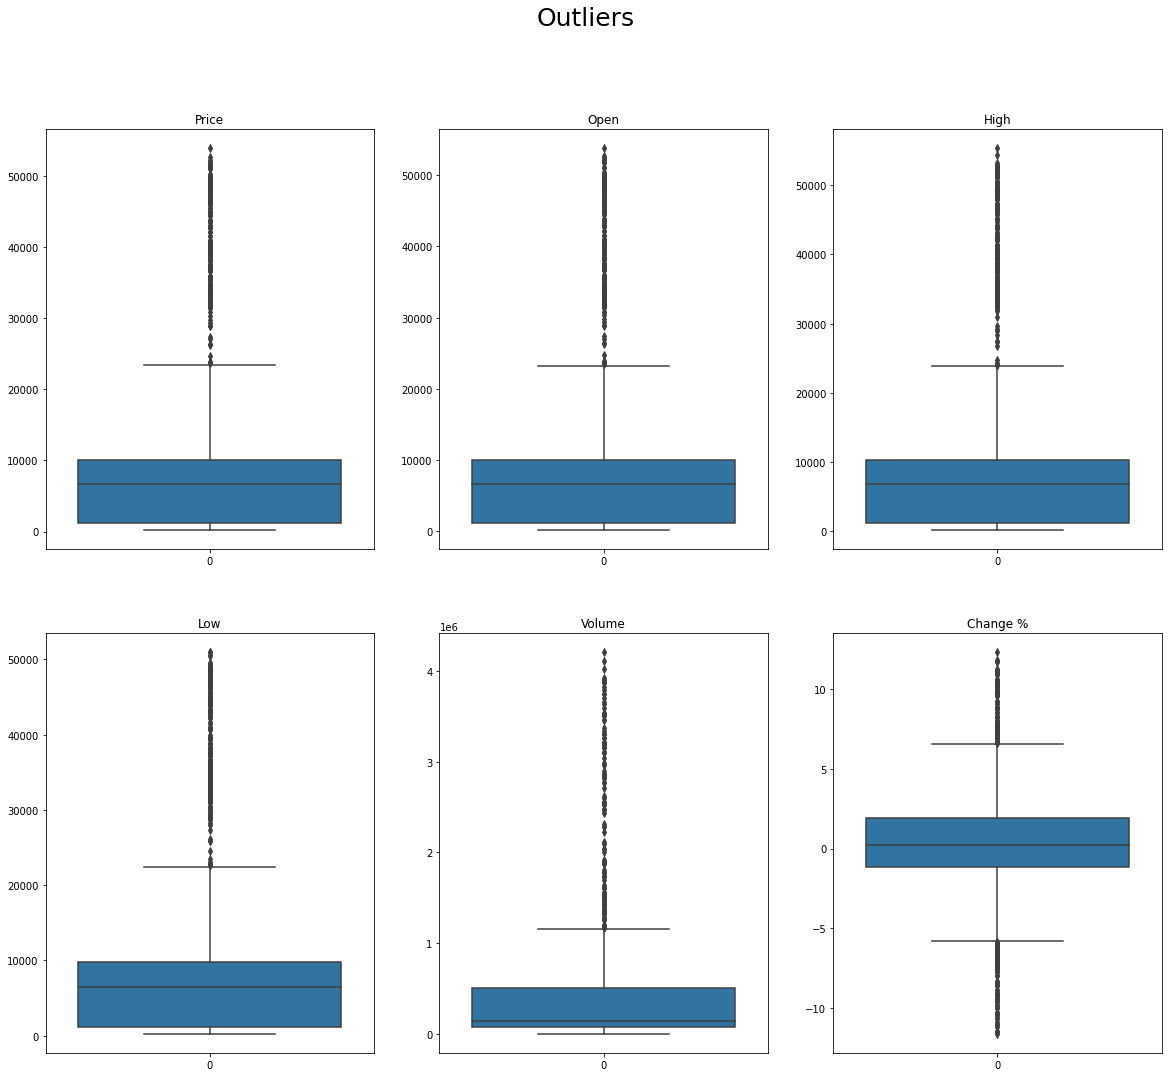

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(20, 17))
fig.suptitle('Outliers', fontsize=25)

ax=sns.boxplot(ax=axes[0,0], data=new_df['Price'])
ax.set_title('Price')
ax=sns.boxplot(ax=axes[0,1], data=new_df['Open'])
ax.set_title('Open')
ax=sns.boxplot(ax=axes[0,2], data=new_df['High'])
ax.set_title('High')
ax=sns.boxplot(ax=axes[1,0], data=new_df['Low'])
ax.set_title('Low')
ax=sns.boxplot(ax=axes[1,1], data=new_df['Vol'])
ax.set_title('Volume')
ax=sns.boxplot(ax=axes[1,2], data=new_df['Change %'])
ax.set_title('Change %')

In [48]:
new_df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Price,2.119380,3.808947
Open,2.121738,3.825358
High,2.118287,3.779055
Low,2.125161,3.872762
Vol,3.400032,13.348052
Change %,0.072067,1.571529


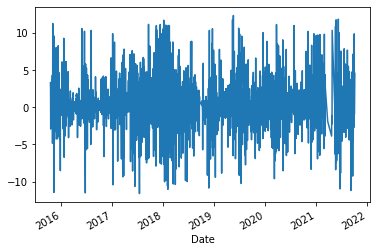

In [49]:
new_df['Change %'].plot()

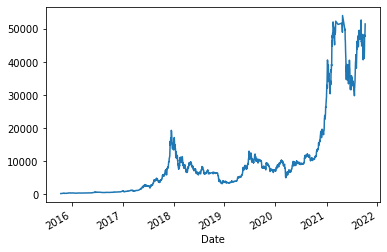

In [50]:
new_df['Price'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb26a1efe10>,
      dtype=object)

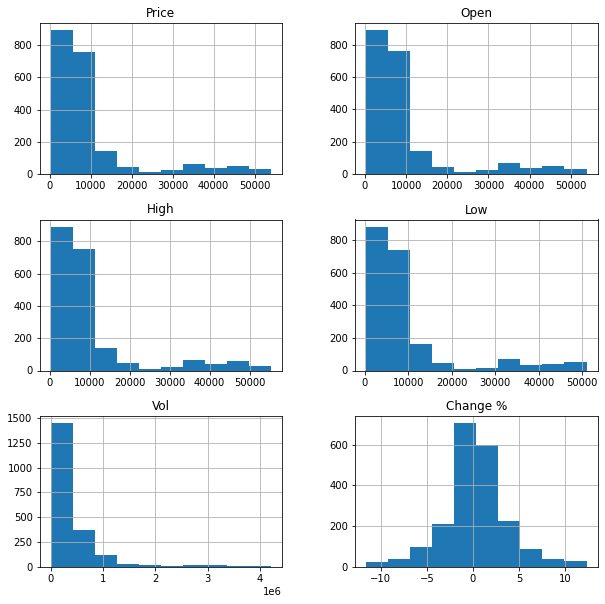

In [51]:
new_df.hist(figsize=(10,10))

In [52]:
cor_matrix = new_df.corr().abs()
print(cor_matrix)

             Price      Open      High       Low       Vol  Change %
Price     1.000000  0.998662  0.999455  0.999242  0.076966  0.029671
Open      0.998662  1.000000  0.999332  0.999025  0.076801  0.005258
High      0.999455  0.999332  1.000000  0.998860  0.076861  0.014403
Low       0.999242  0.999025  0.998860  1.000000  0.076331  0.014515
Vol       0.076966  0.076801  0.076861  0.076331  1.000000  0.008443
Change %  0.029671  0.005258  0.014403  0.014515  0.008443  1.000000


In [53]:
new_df.head()

,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2015-10-16,262.9,254.4,267.3,253.9,95180.0,3.31
2015-10-17,269.6,262.9,275.4,261.7,113840.0,2.55
2015-10-18,261.7,269.6,272.4,259.5,52270.0,-2.93
2015-10-19,263.8,261.7,266.0,259.9,58170.0,0.82
2015-10-20,269.8,263.8,272.1,262.7,75400.0,2.25


In [54]:
def plot_data(new_df,feature):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    new_df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(new_df[feature],dist='norm',plot=plt)
    plt.show()

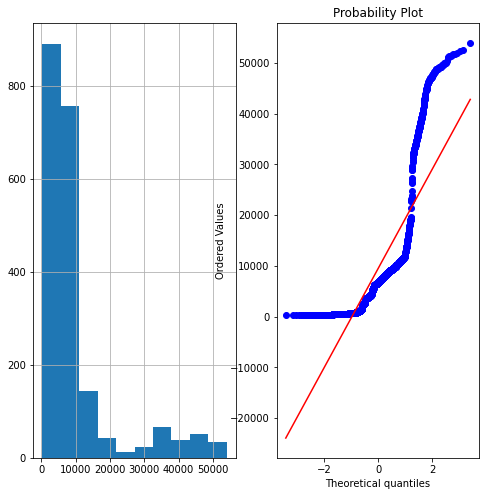

In [55]:
plot_data(new_df,'Price')

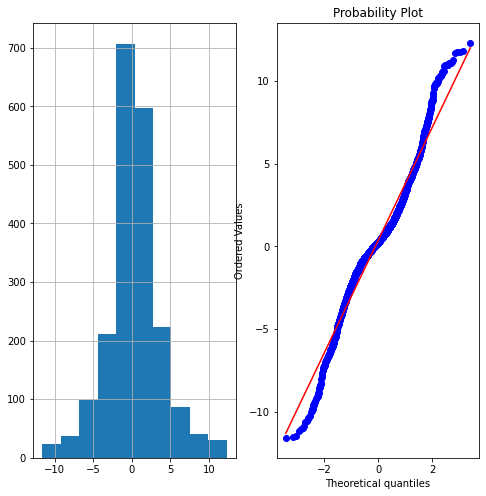

In [56]:
plot_data(new_df,'Change %')
#Change has good  probability plot 

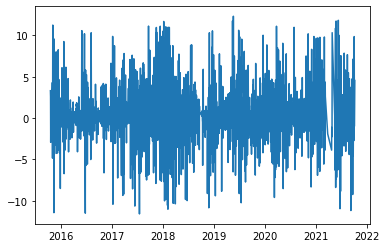

In [57]:
plt.plot(new_df['Change %'])
plt.show()

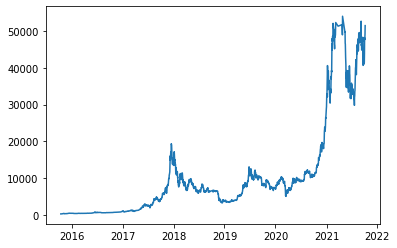

In [58]:
plt.plot(new_df['Price'])
plt.show()

In [59]:
new_df.head()

,Price,Open,High,Low,Vol,Change %
Date,,,,,,
2015-10-16,262.9,254.4,267.3,253.9,95180.0,3.31
2015-10-17,269.6,262.9,275.4,261.7,113840.0,2.55
2015-10-18,261.7,269.6,272.4,259.5,52270.0,-2.93
2015-10-19,263.8,261.7,266.0,259.9,58170.0,0.82
2015-10-20,269.8,263.8,272.1,262.7,75400.0,2.25


In [60]:
df=new_df.reset_index()['Change %']
df

0       3.31
1       2.55
2      -2.93
3       0.82
4       2.25
        ... 
2053    9.86
2054   -1.00
2055    1.12
2056    2.13
2057    4.55
Name: Change %, Length: 2058, dtype: float64

In [61]:
len(df)

2058

<function matplotlib.pyplot.show>

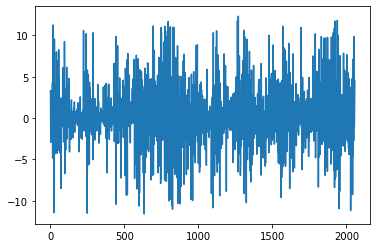

In [62]:
plt.plot(df)
plt.show


In [63]:
minmax=MinMaxScaler(feature_range=(0,1))
df = minmax.fit_transform(np.array(df).reshape(-1,1))

In [64]:
training_size=int(len(df)*.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
training_size,test_size


(1337, 721)

In [65]:
len(train_data)+len(test_data)



2058

In [66]:

def create_dataset(dataset, time_step=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [67]:
time_step=20
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step) 


In [68]:
x_train


array([[0.62332776, 0.59155518, 0.36245819, ..., 0.95526756, 0.9180602 ,
        0.53135452],
       [0.59155518, 0.36245819, 0.51923077, ..., 0.9180602 , 0.53135452,
        0.2951505 ],
       [0.36245819, 0.51923077, 0.57901338, ..., 0.53135452, 0.2951505 ,
        0.34406355],
       ...,
       [0.89590301, 0.22575251, 0.41262542, ..., 0.44147157, 0.36705686,
        0.27466555],
       [0.22575251, 0.41262542, 0.59824415, ..., 0.36705686, 0.27466555,
        0.44941472],
       [0.41262542, 0.59824415, 0.53971572, ..., 0.27466555, 0.44941472,
        0.5451505 ]])

In [69]:
print(x_train.shape), print(y_train.shape)

(1316, 20)
(1316,)


(None, None)

In [70]:
print(x_test.shape), print(y_test.shape)

(700, 20)
(700,)


(None, None)

In [71]:
# reshaping the input [sample ,time steps ,features ] For LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test =x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [72]:
# creating the model 
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
21/21 [==============================] - 8s 113ms/step - loss: 0.0649 - val_loss: 0.0212
Epoch 2/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0231 - val_loss: 0.0199
Epoch 3/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0220 - val_loss: 0.0199
Epoch 4/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0221 - val_loss: 0.0199
Epoch 5/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0224 - val_loss: 0.0211
Epoch 6/100
21/21 [==============================] - 1s 46ms/step - loss: 0.0221 - val_loss: 0.0199
Epoch 7/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0222 - val_loss: 0.0205
Epoch 8/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0222 - val_loss: 0.0200
Epoch 9/100
21/21 [==============================] - 1s 47ms/step - loss: 0.0219 - val_loss: 0.0201
Epoch 10/100
21/21 [==============================] - 1s 48ms/step - loss: 0.0220 - val_loss: 0.020

In [75]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [76]:
train_predict=minmax.inverse_transform(train_predict)
test_predict=minmax.inverse_transform(test_predict)

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.2245114937462381

In [79]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.20603063862267953

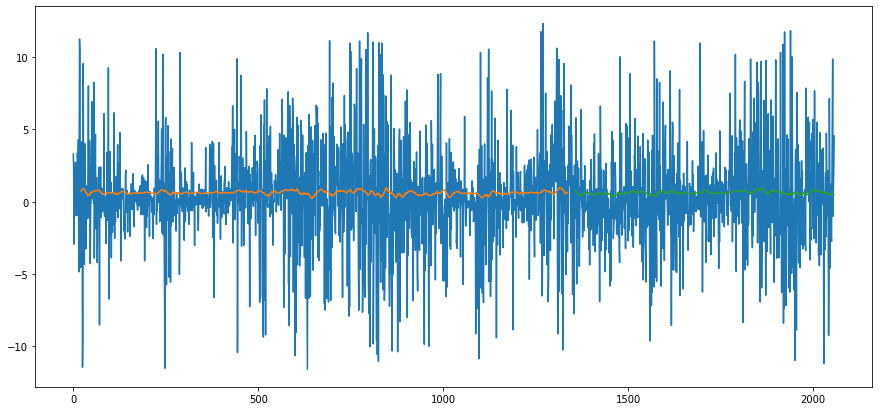

In [80]:
time_step=20
plt.figure(figsize=(15,7))
trainpredictplot=np.empty_like(df)
trainpredictplot[:, :]=np.nan
trainpredictplot[time_step:len(train_predict)+time_step, :] = train_predict
testpredictplot=np.empty_like(df)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(time_step*2)+1:len(df)-1, :] = test_predict
plt.plot(minmax.inverse_transform(df))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [81]:
len(test_data)

721

In [82]:
input_data=test_data[701:].reshape(1,-1)
input_data.shape

(1, 20)

In [83]:
price_input=list(input_data)
price_input=price_input[0].tolist()
price_input


[0.45150501672240806,
 0.4443979933110368,
 0.5756688963210702,
 0.3925585284280937,
 0.09824414715719065,
 0.2683946488294314,
 0.7830267558528428,
 0.6116220735785953,
 0.2938963210702341,
 0.47198996655518394,
 0.5355351170568562,
 0.3850334448160535,
 0.37081939799331104,
 0.5372073578595318,
 0.7148829431438127,
 0.8971571906354515,
 0.44314381270903014,
 0.5317725752508361,
 0.5739966555183946,
 0.6751672240802675]

In [84]:
first_output=[]
n_step=20
i=0
while(i<11):
     if(len(price_input)>n_step):
        input_data=np.array(price_input[1:])
        print(' {} day input {} '.format(i,input_data))
        input_data=input_data.reshape(1,-1)
        input_data=input_data.reshape((1,n_step,1))
        y_new=model.predict(input_data,verbose=0)
        print('{} day output {}'.format(i,y_new))
        price_input.extend(y_new[0].tolist())
        price_input=price_input[1:]
        first_output.extend(y_new.tolist())
        i=i+1 
     else:
        input_data=input_data.reshape((1,n_step,1))
        y_new=model.predict(input_data,verbose=0)
        print(y_new[0])
        price_input.extend(y_new[0].tolist())
        print(len(price_input))
        first_output.extend(y_new.tolist())
        i=i+1

print(first_output)  






[0.5055194]
21
 1 day input [0.44439799 0.5756689  0.39255853 0.09824415 0.26839465 0.78302676
 0.61162207 0.29389632 0.47198997 0.53553512 0.38503344 0.3708194
 0.53720736 0.71488294 0.89715719 0.44314381 0.53177258 0.57399666
 0.67516722 0.50551939] 
1 day output [[0.5068674]]
 2 day input [0.5756689  0.39255853 0.09824415 0.26839465 0.78302676 0.61162207
 0.29389632 0.47198997 0.53553512 0.38503344 0.3708194  0.53720736
 0.71488294 0.89715719 0.44314381 0.53177258 0.57399666 0.67516722
 0.50551939 0.50686741] 
2 day output [[0.50846416]]
 3 day input [0.39255853 0.09824415 0.26839465 0.78302676 0.61162207 0.29389632
 0.47198997 0.53553512 0.38503344 0.3708194  0.53720736 0.71488294
 0.89715719 0.44314381 0.53177258 0.57399666 0.67516722 0.50551939
 0.50686741 0.50846416] 
3 day output [[0.5093573]]
 4 day input [0.09824415 0.26839465 0.78302676 0.61162207 0.29389632 0.47198997
 0.53553512 0.38503344 0.3708194  0.53720736 0.71488294 0.89715719
 0.44314381 0.53177258 0.57399666 0.6751

In [85]:
newday=np.arange(1,n_step+1)
predicted_days=np.arange(n_step+1,n_step+12)

In [86]:
len(df)

2058

In [87]:
df_new=df.tolist()
df_new.extend(first_output)


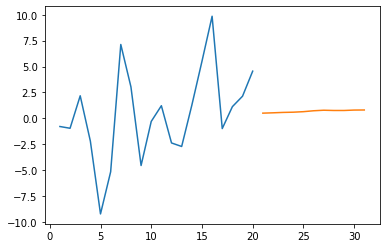

In [88]:
plt.plot(newday,minmax.inverse_transform(df[2038:]))
plt.plot(predicted_days,minmax.inverse_transform(first_output))

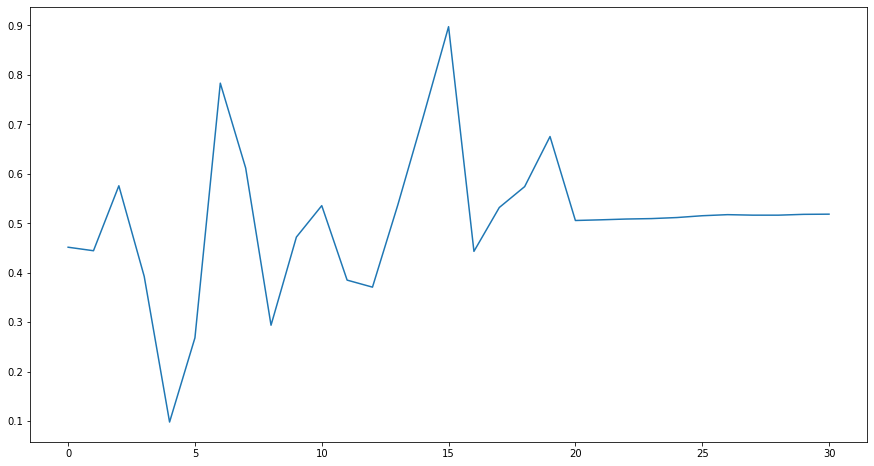

In [89]:
plt.figure(figsize=(15,8))
df=df.tolist()
df.extend(first_output)
plt.plot(df[2038:])


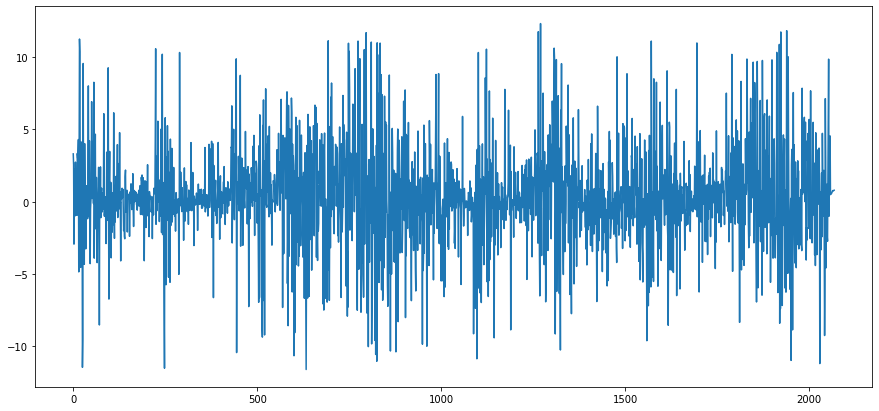

In [90]:
plt.figure(figsize=(15,7))
df=minmax.inverse_transform(df).tolist()
plt.plot(df)

In [93]:
predicted_days

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [95]:
predictions =minmax.inverse_transform(first_output)
predictions

array([[0.49202381],
       [0.52426842],
       [0.56246265],
       [0.58382598],
       [0.63425309],
       [0.72185788],
       [0.7740971 ],
       [0.74960711],
       [0.74912094],
       [0.78925133],
       [0.79775018]])